3546.9168093078533
Stopped with Error at 0.64600
[[ 2.66128859]
 [-3.12639301]
 [11.15933173]]


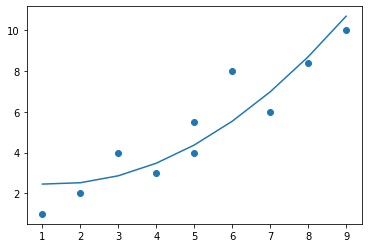

In [5]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation

"""
Dummy Data for Linear Regression
"""
data = [(1, 1), (2, 2), (3, 4), (4, 3), (5, 5.5), (6, 8), (7, 6), (8, 8.4), (9, 10), (5, 4)]    

"""
Plot the line using theta_values
"""
def plot_line(formula, x_range, order_of_regression):
    x = np.array(x_range).tolist()  
    y = [formula(update_features(x_i, order_of_regression, 9)) for x_i in x]
    plt.plot(x, y)

"""
Hypothesis Function
"""
def h(x, theta):
    return np.matmul(theta.T, x)[0][0]

"""
Partial Derivative w.r.t. theta_i
"""
def j_prime_theta(data, theta, order_of_regression, i):
    result = 0
    m = len(data)
    for x, y in data :
        x = update_features(x, order_of_regression)
        result += (h(x, theta) - y) * x[i]
    
    return (1/m) * result

"""
Update features by order of the regression
"""

def update_features(x, order_of_regression, m = 9):
    features = [1]
    for i in range(order_of_regression):
        features.append(math.pow(x, i+1)/ math.pow(m, i+1))
    return np.atleast_2d(features).T

"""
Cost Function
"""
def j(data, theta, order_of_regression):
    cost = 0
    m = len(data)
    for x, y in data:
        x = update_features(x, order_of_regression)
        cost += math.pow(h(x, theta) - y, 2)
    return (1/(2*m)) * cost

"""
Simultaneous Update
"""
def update_theta(data, alpha, theta, order_of_regression):
    temp = []
    for i in range(order_of_regression+1):
        temp.append(theta[i] - alpha * j_prime_theta(data, theta, order_of_regression, i))
    theta = np.array(temp)
    return theta
    
"""
Gradient Descent For Multivariate Regression
"""
def gradient_descent(data, alpha, tolerance, theta=[], order_of_regression = 2):
    if len(theta) == 0:
        theta = np.atleast_2d(np.random.random(order_of_regression+1) * 100).T
    prev_j = 10000
    curr_j = j(data, theta, order_of_regression)
    print(curr_j)
    cost_history = []
    theta_history = [] 
    while(abs(curr_j - prev_j) > tolerance):
        try:
            cost_history.append(curr_j)
            theta_history.append(theta)
            theta = update_theta(data, alpha, theta, order_of_regression)
            prev_j = curr_j
            curr_j = j(data, theta, order_of_regression)
        except:
            break
    print("Stopped with Error at %.5f" % prev_j)
    return theta, cost_history, theta_history

theta, cost_history, theta_history = gradient_descent(data, 0.1, 0.0001, order_of_regression=2)

f = functools.partial(h, theta=theta_history[-1])
plt.scatter([i[0] for i in data], [i[1] for i in data])
plot_line(f, range(1,10), order_of_regression=2)
plt.show()

AttributeError: 'list' object has no attribute 'shape'

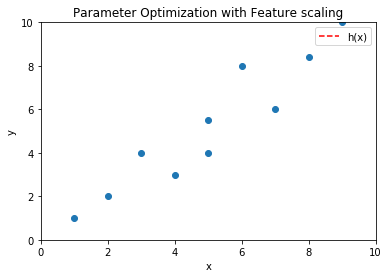

In [7]:
from IPython.core.display import display, HTML
fig, ax = plt.subplots()
x = []
y = []
plt.scatter([i[0] for i in data], [i[1] for i in data])
ln, = plt.plot(x, y, 'r--', animated=True, label='h(x)')
plt.title('Parameter Optimization with Feature scaling')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend(handles=[ln])
    return ln,

def update(frame):
    theta = frame
    x = np.array(range(1, 10))
    f = functools.partial(h, theta=theta)
    y = [f(update_features(x_i, 2)) for x_i in x]
    ln.set_data(x, y)
    return ln,

def data_gen():
    print(theta_history.shape)
    for i in theta_history[::10]:
        #print(i.shape)
        yield i

ani = FuncAnimation(fig, update, frames=data_gen(),
                    init_func=init, blit=False, interval=100)
display(HTML(ani.to_html5_video()))